# Библиотеки

In [12]:
from zlib import crc32

import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

import matplotlib.pyplot as plt

# Код генерации выборки

In [13]:
import re
EMAIL_REGEX = re.compile(r"[^@]+@phystech.edu")

def generate_dataset(code):
    rs = np.random.RandomState(code)
    alpha = rs.uniform()*10
    data = rs.randn(100, 2)
    data[:,1] = data[:, 0]
    data[:,1] += rs.randn(100)*alpha
    data[-1,0] = 99999
    return data

# Генерация выборки для вашей почты

<span style="color:red">
    ВАЖНО!
    Почта, которую укажете ниже и почта с которой Вы отправляете домашнее задание должна совпадать!
    В момент проверки задания алгоритм генерирует выборку на основе почты из анкеты!
</span>

Внимательно проверьте почту для которой выполняется задание!

In [14]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
assert EMAIL_REGEX.match(task['mail']), 'Not a mail in the phystech.edu domain'
task['id'] = crc32(task['mail'].encode('utf-8'))
task['data'] = generate_dataset(task['id'])

task #yurchenko.aa@phystech.edu
None

Enter your mail: yurchenko.aa@phystech.edu


# Работа с выборкой

In [15]:
data = task['data']

In [16]:
import pandas as pd
df = pd.DataFrame(data)
df.describe()

,0,1
count,100.000000,100.000000
mean,999.991322,-0.283370
std,9999.899904,6.482348
min,-2.587616,-18.882937
25%,-0.606428,-4.611112
50%,0.077320,0.116803
75%,0.693844,3.510049
max,99999.000000,17.484180


In [17]:
df.tail()

,0,1
95,-1.303668,-4.849006
96,-1.984683,-5.819997
97,1.210922,1.083685
98,0.467095,5.522409
99,99999.000000,7.068834


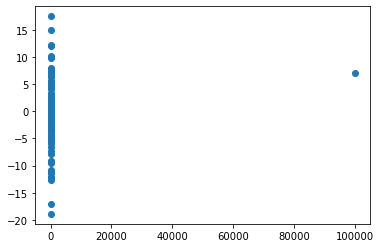

In [18]:
plt.scatter(x = df[0], y = df[1]) # демонстрация выброса
None

### Существует ли линейная взаимосвязь между столбцами выборки по t-критерию Стьюдента?

In [19]:
print('r_pearson = {:.3f}\np_value_non_correlation = {:.3f}'.format(*st.pearsonr(df[0], df[1])))

r_pearson = 0.115
p_value_non_correlation = 0.256


$p\_value > 0.05 \Rightarrow$
Не отвергается гипотеза о том, что данные не скоррелированы (линейной взаимосвязи не существует)

In [20]:
df_new = df.drop(df[(df.abs() > df.mean() + 3 * df.std()).any(axis = 1)].index, axis = 0) # удаление выбросов

In [21]:
df_new.describe()

,0,1
count,99.000000,99.000000
mean,0.001336,-0.357634
std,0.875714,6.472439
min,-2.587616,-18.882937
25%,-0.610533,-4.670199
50%,0.070173,0.017716
75%,0.660657,3.177572
max,1.718465,17.484180


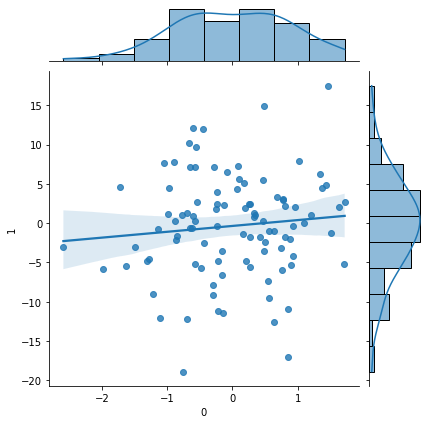

In [22]:
sns.jointplot(x = df_new[0], y = df_new[1], kind = 'reg')
None

### Существует ли линейная взаимосвязь между столбцами выборки по t-критерию Стьюдента, если исключить выбросы из выборки? 

In [23]:
print('r_pearson_new = {:.3f}\np_value_non_correlation = {:.3f}'.format(*st.pearsonr(df_new[0], df_new[1])))

r_pearson_new = 0.101
p_value_non_correlation = 0.321


$p\_value > 0.05 \Rightarrow$
Не отвергается гипотеза о том, что данные не скоррелированы (линейной взаимосвязи не существует и в выборке с исключенными выбросами)

### Коэффициент корреляции Кендалла по исходной выборке (без удаления выбросов):

In [24]:
print('r_kendall = {:.3f}\np_value_non_correlation_kendall = {:.3f}'.format(*st.kendalltau(df[0], df[1])))

r_kendall = 0.058
p_value_non_correlation_kendall = 0.394


Коэффициент корреляции Кендалла $= r\_kendall$